Package Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

Global Declarations

In [10]:
DATA = '../data/data.csv'
NEIGHBOURHOOD = []
ROOM_TYPE = []

Data Preprocessing

In [11]:
#read data from csv file
def read_data(file_name):
    data = pd.read_csv(file_name)
    return data 

In [12]:
def df_cleanup():
    
    df = pd.DataFrame(read_data(DATA))

    df = df.drop(df[df.availability_365 < 1].index)
    
    df = df.drop('license', axis=1)
    df = df.drop('last_review', axis=1)
    df = df.drop('reviews_per_month', axis=1)
    df = df.drop('calculated_host_listings_count', axis=1)
    df = df.drop('minimum_nights', axis=1)
    df = df.drop('number_of_reviews_ltm', axis=1)
    df = df.drop('name', axis=1)
    df = df.drop('host_name', axis=1)
    df = df.drop('availability_365', axis=1)

    df = df.replace('Studio', 0)
    df = df.replace('No rating', -1)
    df = df.replace('Not specified', -1)

    df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['baths'] = pd.to_numeric(df['baths'], errors='coerce')

    df = df.replace('Manhattan', 1)
    df = df.replace('Queens', 2)
    df = df.replace('Staten Island', 3)
    df = df.replace('Brooklyn', 4)
    df = df.replace('Bronx', 5)

    for i in df['neighbourhood']:
        if i in NEIGHBOURHOOD:
            df = df.replace(i, NEIGHBOURHOOD.index(i))
        else:
            NEIGHBOURHOOD.append(i)
            df = df.replace(i, NEIGHBOURHOOD.index(i))
    
    room_type = []

    for i in df['room_type']:
        if i in ROOM_TYPE:
            df = df.replace(i, ROOM_TYPE.index(i))
        else:
            ROOM_TYPE.append(i)
            df = df.replace(i, ROOM_TYPE.index(i))

    df['neighbourhood_group'] = pd.to_numeric(df['neighbourhood_group'], errors='coerce')
    df['neighbourhood'] = pd.to_numeric(df['neighbourhood'], errors='coerce')
    df['room_type'] = pd.to_numeric(df['room_type'], errors='coerce')

    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df = df[df['price'] <= 1000]

    numerical_columns = df.select_dtypes(include='number')
    correlation_matrix = numerical_columns.corr()
    # Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.xticks(rotation = 25)
    plt.show()

    # print(df.head(), "before normalization")
    # df['price'] = MinMaxScaler(df[['price']])
    # df['rating'] = MinMaxScaler(df[['rating']])
    # df['number_of_reviews'] = MinMaxScaler(df[['number_of_reviews']])
    # df['bedrooms'] = MinMaxScaler(df[['bedrooms']])
    # df['beds'] = MinMaxScaler(df[['beds']])
    # df['baths'] = MinMaxScaler(df[['baths']])
    # df['latitude'] = MinMaxScaler(df[['latitude']])
    # df['longitude'] = MinMaxScaler(df[['longitude']])
    # print(df.head(), "after normalization")

    return df


/var/folders/rq/91x5rw3560s1y0v50f_7jmz00000gn/T/ipykernel_5374/2907913296.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Bronx', 5)
/var/folders/rq/91x5rw3560s1y0v50f_7jmz00000gn/T/ipykernel_5374/2907913296.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(i, NEIGHBOURHOOD.index(i))
/var/folders/rq/91x5rw3560s1y0v50f_7jmz00000gn/T/ipykernel_5374/2907913296.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

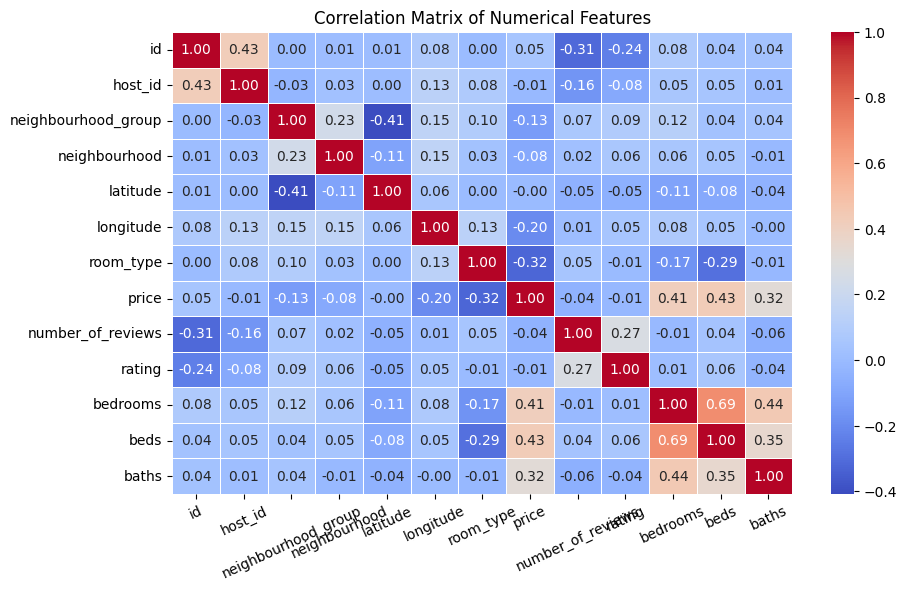

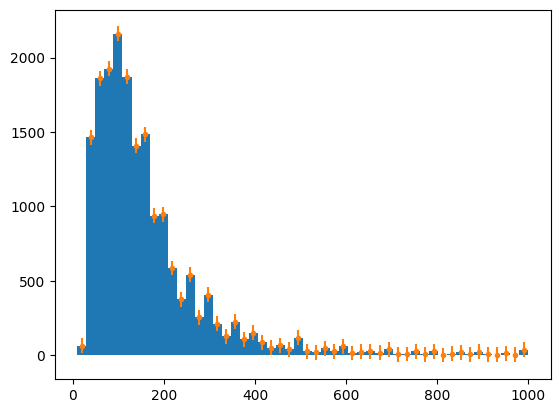

In [26]:
DF = df_cleanup()
# DF = DF[['baths', 'beds', 'bedrooms', 'room_type', 'longitude', 'neighbourhood_group', 'price']]

hist, bin_edges = np.histogram(DF['price'], bins=50, density=False)
bin_center = (bin_edges[:-1] + bin_edges[1:])/2

plt.figure()
plt.hist(DF['price'], bins=50, density=False)
plt.errorbar(bin_center, hist, yerr=50, fmt='.')
plt.show()

In [14]:
print(DF.shape)
print(DF.dtypes)
print(ROOM_TYPE)
print(NEIGHBOURHOOD)
print(DF)

(17963, 7)
baths                  float64
beds                     int64
bedrooms                 int64
room_type                int64
longitude              float64
neighbourhood_group      int64
price                  float64
dtype: object
['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
["Hell's Kitchen", 'Chelsea', 'Washington Heights', 'Murray Hill', 'Williamsburg', 'Sunset Park', 'Astoria', 'Financial District', 'Midtown', 'Upper West Side', 'Concourse Village', 'Flushing', 'Greenpoint', 'Cypress Hills', "Prince's Bay", 'Port Richmond', 'East Village', 'Clason Point', 'Bedford-Stuyvesant', 'Gravesend', 'Long Island City', 'Gramercy', 'East Flatbush', 'Kensington', 'St. George', 'South Ozone Park', 'Wakefield', 'Forest Hills', 'Springfield Gardens', 'North Riverdale', 'Belmont', 'Corona', 'Tremont', 'Flatbush', 'West Village', 'Elmhurst', 'Queens Village', 'Harlem', 'Bushwick', 'Sunnyside', 'Boerum Hill', 'Upper East Side', 'Crown Heights', 'Richmond Hill', 'Kips B

In [15]:
#chech if there is entries with price > 3000
def check_price(df):
    if df[df['price'] > 3000].empty:
        print("No entries with price > 3000")
    else:
        print("There are entries with price > 3000")
        print(df[df['price'] > 3000])

check_price(DF)

No entries with price > 3000


In [16]:
# X = DF.drop('price', axis = 1)
# X = X.drop('id', axis = 1)

# y = DF[['price']]

# Scaler = preprocessing.MinMaxScaler()
# X = Scaler.fit_transform(X)
# X = pd.DataFrame(X, columns=DF.columns[2:])

# print(DF.shape)
# print(DF.dtypes)
# print(DF)

### Polynomial Regression

In [17]:
# from sklearn.model_selection import kfold
# pca = PCA(n_components=8)

# poly = PolynomialFeatures(degree=2, include_bias=False)

# poly_features = poly.fit_transform(X)
# poly_features = pca.fit_transform(poly_features)

# # k = 5
# # kf = kfold.KFold(n_splits=k, shuffle=True)

# X_train,X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2)

# reg_model = linear_model.LinearRegression()
# reg_model = LinearRegression().fit(X_train, y_train)

# print('Intercept: ',reg_model.intercept_)
# list(zip(X, reg_model.coef_))

# y_pred= reg_model.predict(X_test)  
# x_pred= reg_model.predict(X_train)

# y_test = pd.DataFrame(y_test)
# y_pred = pd.DataFrame(y_pred)

# reg_model_diff = pd.DataFrame({'Actual value': y_test.iloc[:, 0], 'Predicted value': y_pred.iloc[:, 0]})
# reg_model_diff.dropna(inplace=True)
# print ("Model Score: ", reg_model.score(X_test, y_test))
# print(np.sqrt(metrics.mean_squared_error(y_test,reg_model.predict(X_test))))
# print(reg_model_diff)

### SVM regression

In [18]:
# from sklearn import svm

# regr = svm.SVR()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# regr.fit(X_train, y_train.values.ravel())

# y_pred = regr.predict(X_test)

# print('SVM model score: ', regr.score(X_test, y_test))
# reg_model_diff = pd.DataFrame({'Predicted Value': y_pred, 'Actual Value': y_test.values.ravel()})
# reg_model_diff.dropna(inplace=True)
# print(reg_model_diff)

In [19]:
#evcaluation metrics
# from sklearn import metrics
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('R^2 score:', metrics.r2_score(y_test, y_pred))

Correlation Matrix

In [20]:
# numerical_columns = DF.select_dtypes(include='number')
# correlation_matrix = numerical_columns.corr()
# # Heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix of Numerical Features')
# plt.xticks(rotation = 25)
# plt.show()

In [21]:
# plt.figure(figsize=(10, 6))
# plt.scatter(reg_model_diff.iloc[:, 0], reg_model_diff.iloc[:, 1])
# plt.title("Price Predict")
# plt.xlabel('Actual Value')
# plt.ylabel('Predicted Value')
# plt.show()

Artificial Neural Network

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X = DF.drop('price', axis = 1)
# X = X.drop('id', axis = 1)

y = DF[['price']].values.reshape(-1,)

Scaler = preprocessing.MinMaxScaler()
X = Scaler.fit_transform(X)
# X = pd.DataFrame(X, columns=DF.columns[2:])

# pca = PCA(n_components=8)
# X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
regr = MLPRegressor(max_iter=1800,
                          activation='relu', 
                          hidden_layer_sizes={50,50,25},
                          early_stopping=True,
                          n_iter_no_change=1800,
                          verbose=True,
                          learning_rate='invscaling',
                          learning_rate_init=.001).fit(X_train, y_train)
# print(regr.score(X_test, y_test))
cv = KFold(n_splits=5)
cross_val_score(regr, X_test, y_test, cv=cv)

Iteration 1, loss = 20963.26776705
Validation score: -1.379649
Iteration 2, loss = 19482.54375636
Validation score: -1.058799
Iteration 3, loss = 14722.67430927
Validation score: -0.382682
Iteration 4, loss = 9915.71478999
Validation score: -0.071973
Iteration 5, loss = 8895.23327827
Validation score: -0.031448
Iteration 6, loss = 8613.02934940
Validation score: 0.000532
Iteration 7, loss = 8330.44200939
Validation score: 0.033309
Iteration 8, loss = 8051.36332797
Validation score: 0.067601
Iteration 9, loss = 7773.13807536
Validation score: 0.098692
Iteration 10, loss = 7498.26485176
Validation score: 0.131642
Iteration 11, loss = 7228.87329353
Validation score: 0.162988
Iteration 12, loss = 6974.58196533
Validation score: 0.191754
Iteration 13, loss = 6741.99286048
Validation score: 0.219550
Iteration 14, loss = 6541.45023471
Validation score: 0.241571
Iteration 15, loss = 6372.16912075
Validation score: 0.261639
Iteration 16, loss = 6218.27863948
Validation score: 0.278760
Iteration

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 8688.63945144
Validation score: -0.046152
Iteration 29, loss = 8642.59451986
Validation score: -0.040442
Iteration 30, loss = 8597.10755280
Validation score: -0.034717
Iteration 31, loss = 8552.31159471
Validation score: -0.029190
Iteration 32, loss = 8508.23612800
Validation score: -0.023411
Iteration 33, loss = 8462.96687449
Validation score: -0.017800
Iteration 34, loss = 8417.90713347
Validation score: -0.012310
Iteration 35, loss = 8374.58674877
Validation score: -0.006723
Iteration 36, loss = 8329.57469946
Validation score: -0.001138
Iteration 37, loss = 8285.60885530
Validation score: 0.004438
Iteration 38, loss = 8241.72099246
Validation score: 0.010212
Iteration 39, loss = 8196.89667508
Validation score: 0.015713
Iteration 40, loss = 8152.34834145
Validation score: 0.021294
Iteration 41, loss = 8109.20514541
Validation score: 0.027110
Iteration 42, loss = 8063.64600298
Validation score: 0.032507
Iteration 43, loss = 8020.83900609
Validation score: 0.038097

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 15355.17796458
Validation score: -0.700396
Iteration 13, loss = 13959.18638533
Validation score: -0.525089
Iteration 14, loss = 12633.47799042
Validation score: -0.365017
Iteration 15, loss = 11448.59506567
Validation score: -0.234143
Iteration 16, loss = 10518.23448153
Validation score: -0.138335
Iteration 17, loss = 9835.51826625
Validation score: -0.080364
Iteration 18, loss = 9433.48954977
Validation score: -0.048600
Iteration 19, loss = 9208.70024957
Validation score: -0.033909
Iteration 20, loss = 9086.27545106
Validation score: -0.026365
Iteration 21, loss = 9019.43736044
Validation score: -0.020636
Iteration 22, loss = 8961.31050731
Validation score: -0.014748
Iteration 23, loss = 8913.28291998
Validation score: -0.009042
Iteration 24, loss = 8865.33113184
Validation score: -0.002529
Iteration 25, loss = 8818.91255226
Validation score: 0.003210
Iteration 26, loss = 8773.95153821
Validation score: 0.008769
Iteration 27, loss = 8728.60447327
Validation score:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 9672.42950656
Validation score: -0.075052
Iteration 20, loss = 9463.48675854
Validation score: -0.057861
Iteration 21, loss = 9359.34078154
Validation score: -0.048291
Iteration 22, loss = 9288.04033801
Validation score: -0.041424
Iteration 23, loss = 9234.77233221
Validation score: -0.035018
Iteration 24, loss = 9182.76458415
Validation score: -0.028895
Iteration 25, loss = 9133.70858079
Validation score: -0.022826
Iteration 26, loss = 9085.23137747
Validation score: -0.016892
Iteration 27, loss = 9036.94402814
Validation score: -0.011226
Iteration 28, loss = 8990.95300040
Validation score: -0.005605
Iteration 29, loss = 8944.22350910
Validation score: 0.000045
Iteration 30, loss = 8898.26775645
Validation score: 0.005602
Iteration 31, loss = 8852.18748163
Validation score: 0.011006
Iteration 32, loss = 8807.25237695
Validation score: 0.016416
Iteration 33, loss = 8762.57496689
Validation score: 0.021887
Iteration 34, loss = 8716.78896432
Validation score: 0.02715

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 16080.47885278
Validation score: -0.797824
Iteration 12, loss = 14818.33478535
Validation score: -0.656301
Iteration 13, loss = 13480.76263235
Validation score: -0.512705
Iteration 14, loss = 12160.65931765
Validation score: -0.376687
Iteration 15, loss = 10981.05523593
Validation score: -0.256050
Iteration 16, loss = 9991.83597948
Validation score: -0.161287
Iteration 17, loss = 9287.10048391
Validation score: -0.093482
Iteration 18, loss = 8835.48244538
Validation score: -0.051031
Iteration 19, loss = 8581.72336015
Validation score: -0.027230
Iteration 20, loss = 8453.53597360
Validation score: -0.014006
Iteration 21, loss = 8386.34033213
Validation score: -0.005476
Iteration 22, loss = 8336.37694920
Validation score: 0.000731
Iteration 23, loss = 8292.78222788
Validation score: 0.005890
Iteration 24, loss = 8248.15522747
Validation score: 0.010097
Iteration 25, loss = 8207.04402364
Validation score: 0.014360
Iteration 26, loss = 8166.73388254
Validation score: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.009839
Iteration 30, loss = 8305.12717210
Validation score: 0.015760
Iteration 31, loss = 8266.98724504
Validation score: 0.022028
Iteration 32, loss = 8228.80892538
Validation score: 0.028103
Iteration 33, loss = 8191.81718848
Validation score: 0.034265
Iteration 34, loss = 8154.21975618
Validation score: 0.040165
Iteration 35, loss = 8115.68314530
Validation score: 0.045947
Iteration 36, loss = 8080.26856194
Validation score: 0.052082
Iteration 37, loss = 8041.36544163
Validation score: 0.057817
Iteration 38, loss = 8005.65394574
Validation score: 0.063645
Iteration 39, loss = 7968.18544954
Validation score: 0.069812
Iteration 40, loss = 7930.36090850
Validation score: 0.075771
Iteration 41, loss = 7894.02624822
Validation score: 0.081875
Iteration 42, loss = 7856.35545374
Validation score: 0.087947
Iteration 43, loss = 7819.74932794
Validation score: 0.094052
Iteration 44, loss = 7781.18480575
Validation score: 0.100200
Iteration 45, loss = 7743.09941755
Validati

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.41720197, 0.32479518, 0.47624529, 0.37391585, 0.32650262])

      Prediction  Actual
0      87.182123   103.0
1     117.681884    90.0
2     143.722931   200.0
3     127.768069   130.0
4     186.128963    79.0
...          ...     ...
3588  136.184896    79.0
3589  188.450963   238.0
3590  176.119965   133.0
3591  466.890844   450.0
3592  122.567724    92.0

[3593 rows x 2 columns]
Error: 97.8560468012806
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
0    1787
dtype: int64
0    0.478605
dtype: float64


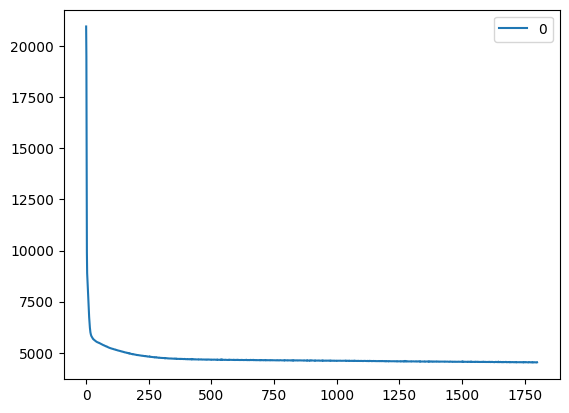

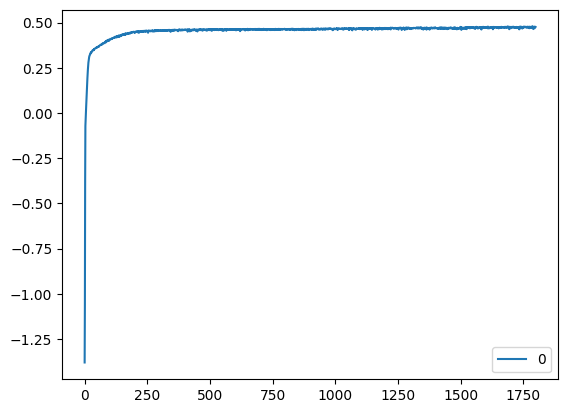

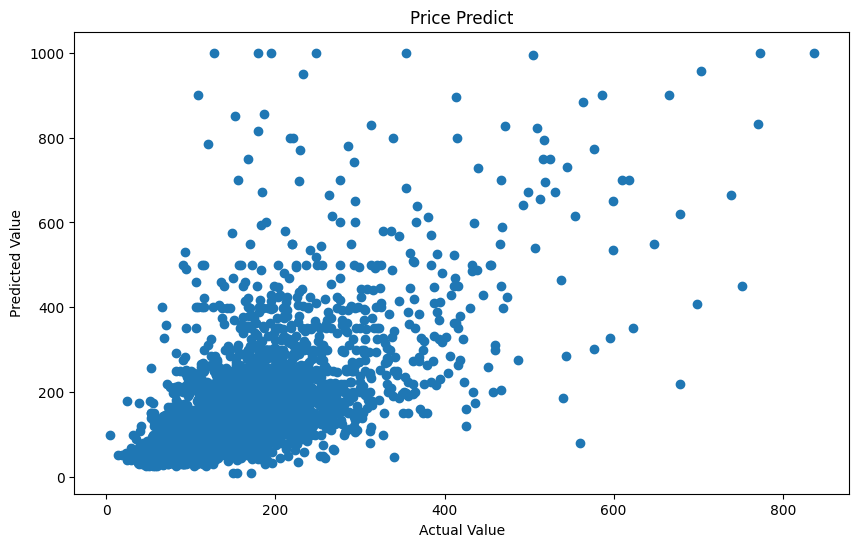

In [29]:
DFT = pd.DataFrame({'Prediction':regr.predict(X_test),'Actual': y_test})
print(DFT)
print('Error:', np.sqrt(metrics.mean_squared_error(y_test,regr.predict(X_test))))
print(pd.DataFrame(regr.loss_curve_).plot())
print(pd.DataFrame(regr.validation_scores_).plot())
print(pd.DataFrame(regr.validation_scores_).idxmax())
print(pd.DataFrame(regr.validation_scores_).max())
# print(regr.best_validation_score_)

plt.figure(figsize=(10, 6))
plt.scatter(DFT.iloc[:, 0], DFT.iloc[:, 1])
plt.title("Price Predict")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()